# Raster Calculations in Python
This lesson covers how to subtract one raster from another. It also covers how to extract pixel values from a set of locations - for example, a buffer region around locations at a field site

## Raster Calculations in Python & Canopy Height Models
We often want to perform calculations on multiple rasters to create a new output raster. For example, if we wanted to calculate a Canopy Height Model (CHM) from a DSM and DTM. 

DSM - DTM = CHM

Let's load the data first

In [1]:
import rioxarray

surface_HARV = rioxarray.open_rasterio("data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Airborne-Remote-Sensing/HARV/DSM/HARV_dsmCrop.tif", masked=True)
terrain_HARV_UTM18 = rioxarray.open_rasterio("data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Airborne-Remote-Sensing/HARV/DTM/HARV_dtmCrop_UTM18.tif", masked=True)

We can perform raster calculations by subtracting two rasters. In the geospatial world, we call this "raster math". Even though `reproject` gets our rasters into the same CRS, they have slightly different extents. We can now use the `reproject_match` function, which both reprojects and clips a raster to the CRS and extent of another

In [2]:
terrain_HARV_matched = terrain_HARV_UTM18.rio.reproject_match(surface_HARV)

We could have used reproject_match on the original DTM model, "HARV_dtmCrop_WGS84.tif". If we had, this would mean one less interpolation, though this will have neglibile impact on the data for our purposes.

Let's subtract the DTM from the DSM to create a CHM. We will use `rioxarray` so that we can easily plot our result and keep track of metadata.

In [3]:
canopy_HARV = surface_HARV - terrain_HARV_matched
canopy_HARV.compute()

<xarray.DataArray (band: 1, y: 1367, x: 1697)>
array([[[ 1.93699951e+01,  1.86799927e+01,  1.70500183e+01, ...,
                     nan,  1.69982910e-01, -1.60003662e-01],
        [ 1.76499939e+01,  1.71700134e+01,  1.56299744e+01, ...,
          0.00000000e+00,  0.00000000e+00,  9.97924805e-03],
        [ 1.81000061e+01,  1.68399963e+01,  1.43200073e+01, ...,
          0.00000000e+00,  1.00006104e-01,  7.99865723e-02],
        ...,
        [ 2.34400024e+01,  2.56800232e+01,  2.60599976e+01, ...,
          1.98999023e+00,  1.09997559e+00,  2.09991455e-01],
        [ 2.63299866e+01,  2.70399780e+01,  1.88900146e+01, ...,
          5.44000244e+00,  0.00000000e+00,  2.72000122e+00],
        [ 2.55499878e+01,  2.81300049e+01,  2.78999939e+01, ...,
                     nan,             nan,  1.85998535e+00]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.315e+05 7.315e+05 ... 7.331e+05 7.331e+05
  * y            (y) float64 4.714e+06 4.714e+06 ... 4.712e+06 4.712e+06
    spatial_ref  int64 0

We can now plot the output. If we use `robust=True`, our plot's color values will be stretched between the 2nd and 98th percentiles.

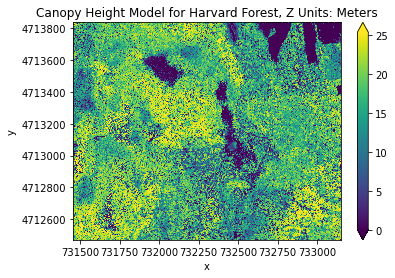

In [9]:
import matplotlib.pyplot as plt
canopy_HARV.plot(cmap="viridis", robust=True)
plt.title("Canopy Height Model for Harvard Forest, Z Units: Meters")
plt.ticklabel_format(style="plain") # use when the title overlaps scientific noatation

Maps can be great, but it can also be informative to plot histograms of values. We can accomplish this using a built-in xarray method we have already been using: `plot`

Text(0.5, 1.0, 'Histogram of Canopy Height in Meters')

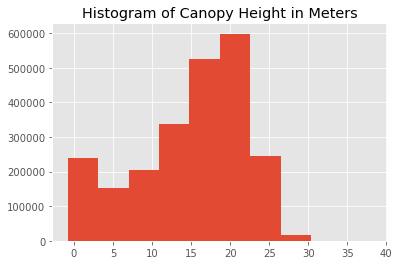

In [16]:
plt.figure()
plt.style.use('ggplot')
canopy_HARV.plot.hist()
plt.title("Histogram of Canopy Height in Meters")

## Challenge: Explore CHM Raster Values
It’s often a good idea to explore the range of values in a raster dataset just like we might explore a dataset that we collected in the field. The histogram we just made is a good start but there’s more we can do to improve our understanding of the data.
   1. What is the min and maximum value for the Harvard Forest Canopy Height Model (canopy_HARV) that we just created?
   2. Plot a histogram with 50 bins instead of 8. What do you notice that wasn’t clear before?
   3. Plot the canopy_HARV raster using breaks that make sense for the data. Include an appropriate color palette for the data, plot title and no axes ticks / labels.


In [23]:
canopy_HARV.min().values

array(-0.80999756)

In [24]:
canopy_HARV.max().values

array(38.16998291)

(array([4.47800e+03, 1.54598e+05, 2.89540e+04, 2.52710e+04, 2.59140e+04,
        2.73580e+04, 2.91990e+04, 3.04870e+04, 3.13490e+04, 3.27730e+04,
        3.45870e+04, 3.71910e+04, 4.06500e+04, 4.40670e+04, 4.90620e+04,
        5.44680e+04, 6.08610e+04, 6.67810e+04, 7.41060e+04, 8.12430e+04,
        8.88060e+04, 9.72790e+04, 1.05715e+05, 1.14162e+05, 1.20317e+05,
        1.26769e+05, 1.27840e+05, 1.25065e+05, 1.16780e+05, 1.01911e+05,
        8.40470e+04, 6.53190e+04, 4.71370e+04, 3.14270e+04, 1.71050e+04,
        8.75100e+03, 4.16800e+03, 1.87700e+03, 9.41000e+02, 4.04000e+02,
        1.62000e+02, 7.20000e+01, 2.00000e+01, 1.50000e+01, 3.00000e+00,
        2.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([-8.09997559e-01, -3.03979492e-02,  7.49201660e-01,  1.52880127e+00,
         2.30840088e+00,  3.08800049e+00,  3.86760010e+00,  4.64719971e+00,
         5.42679932e+00,  6.20639893e+00,  6.98599854e+00,  7.76559814e+00,
         8.54519775e+00,  9.32479736e+00

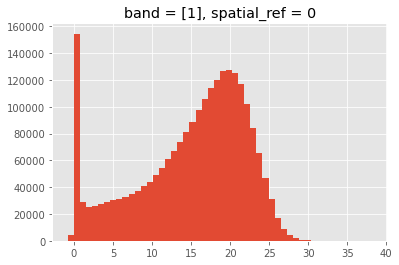

In [21]:
canopy_HARV.plot.hist(bins=50)

## Classifying Continuous Rasters in Python
We can reduce the complexity of our map by classifying it. Classification involves assigning each pixel in the raster to a class based on its value. In Python, we can use the `numpy.digitize` function.

First, we define canopy height classes based on a list of heights `[canopy_HARV.min().values, 2, 10, 20, np.inf]`. By default, each class includes the left, but is not right bound.

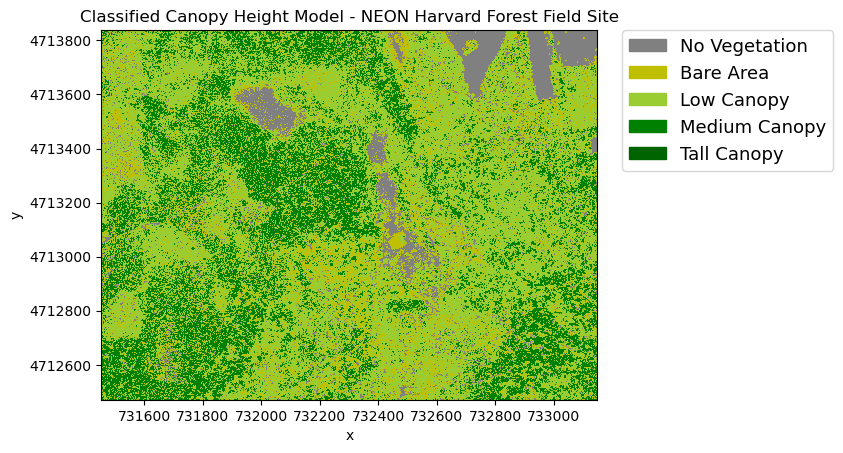

In [27]:
import xarray
from matplotlib.colors import ListedColormap
import earthpy.plot as ep
import numpy as np

# defines the bins for pixel values
class_bins = [canopy_HARV.min().values, 2, 10, 20, np.inf]

# define color map of the map legend
height_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
height_cmap = ListedColormap(height_colors)

# define class names for the legend
category_names = [
    "No Vegetation",
    "Bare Area", 
    "Low Canopy",
    "Medium Canopy",
    "Tall Canopy",
]

# we need to know what order the legend items should be arranged
category_indices = list(range(len(category_names)))

# the numpy.digitize function returns an ulabeled array, in this case, a
# classified array without amy metadata. That doesn't work since we need
# the coordinates and other spatial metadata. We can get around this using
# xarray.apply_ufunc, which can run the function across the data array while
# preserving metadata.
canopy_height_classified = xarray.apply_ufunc(
    np.digitize, # function to run across the input array
    canopy_HARV, # function arg 1 the array that needs to be classified
    class_bins # function arg 2 the classification bins
)

# making the plot
plt.style.use("default")
plt.figure()
im = canopy_height_classified.plot(cmap=height_cmap, add_colorbar=False)
ep.draw_legend(im_ax=im, classes = category_indices,titles=category_names)
# earthpy helps us by drawing a legend given an existing image plot, legend items, and indices
plt.title("Classified Canopy Height Model - NEON Harvard Forest Field Site")
plt.ticklabel_format(style="plain")

## Reassigning Geospatial Metadata and Exporting a GeoTiff
When we computed the CHM, the output no longer contains a reference to a nodata value, like -9999.0, which was associated with the DTM and DSM. Some calculations, like `numpy.digitize` can remove all geospatial metadata. Of what can be lost, the CRS and nodata value are particularly important to keep track of. Before we export the product of our calculation to a GeoTiff with the `to_raster` function, we need to reassign this metadata.

In [28]:
canopy_HARV.rio.write_crs(surface_HARV.rio.crs, inplace=True)
canopy_HARV.rio.set_nodata(-9999.0, inplace=True)

<xarray.DataArray (band: 1, y: 1367, x: 1697)>
array([[[ 1.93699951e+01,  1.86799927e+01,  1.70500183e+01, ...,
                     nan,  1.69982910e-01, -1.60003662e-01],
        [ 1.76499939e+01,  1.71700134e+01,  1.56299744e+01, ...,
          0.00000000e+00,  0.00000000e+00,  9.97924805e-03],
        [ 1.81000061e+01,  1.68399963e+01,  1.43200073e+01, ...,
          0.00000000e+00,  1.00006104e-01,  7.99865723e-02],
        ...,
        [ 2.34400024e+01,  2.56800232e+01,  2.60599976e+01, ...,
          1.98999023e+00,  1.09997559e+00,  2.09991455e-01],
        [ 2.63299866e+01,  2.70399780e+01,  1.88900146e+01, ...,
          5.44000244e+00,  0.00000000e+00,  2.72000122e+00],
        [ 2.55499878e+01,  2.81300049e+01,  2.78999939e+01, ...,
                     nan,             nan,  1.85998535e+00]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.315e+05 7.315e+05 ... 7.331e+05 7.331e+05
  * y            (y) float64 4.714e+06 4.714e+06 ... 4.712e+06 4.712e+06
    spatial_ref  int64 0

When we write this raster object to a GeoTiff we'll name it `CHM_HARV.tif`. This name allows us to quickly remember both what the data contains and from where. The `to_raster()` function by default writes the output file to your working directory unless you specify a full file path.

In [30]:
import os
os.makedirs("./data/outputs/", exist_ok=True)
canopy_HARV.rio.to_raster("./data/outputs/CHM_HARV.tif")

## Challenge: Explore the NEON San Joaquin Experimental Range Field Site
Data are often more interesting and powerful when we compare them across various locations. Let’s compare some data collected over Harvard Forest to data collected in Southern California. The NEON San Joaquin Experimental Range (SJER) field site located in Southern California has a very different ecosystem and climate than the NEON Harvard Forest Field Site in Massachusetts.

Import the SJER DSM and DTM raster files and create a Canopy Height Model. Then compare the two sites. Be sure to name your Python objects and outputs carefully, as follows: objectType_SJER (e.g. surface_SJER). This will help you keep track of data from different sites!

1. You should have the DSM and DTM data for the SJER site already loaded from the Reproject Raster Data with Rioxarray episode. Don’t forget to check the CRSs and units of the data.
2. Create a CHM from the two raster layers and check to make sure the data are what you expect.
3. Plot the CHM from SJER.
4. Export the SJER CHM as a GeoTiff.
5. Compare the vegetation structure of the Harvard Forest and San Joaquin Experimental Range.

In [40]:
from pyproj import CRS

# loads in rasters
filepath = "data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Airborne-Remote-Sensing/SJER/DTM/SJER_dtmCrop_WGS84.tif"
terrain_SJER = rioxarray.open_rasterio(filepath, masked=True)
filepath = "data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Airborne-Remote-Sensing/SJER/DSM/SJER_dsmCrop.tif"
surface_SJER = rioxarray.open_rasterio(filepath, masked=True)

# reads crss
terrain_CRS = CRS(terrain_SJER.rio.crs)
surface_CRS = CRS(surface_SJER.rio.crs)

print(terrain_CRS.axis_info)
print(surface_CRS.axis_info)

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree), Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]
[Axis(name=Easting, abbrev=, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre), Axis(name=Northing, abbrev=, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]


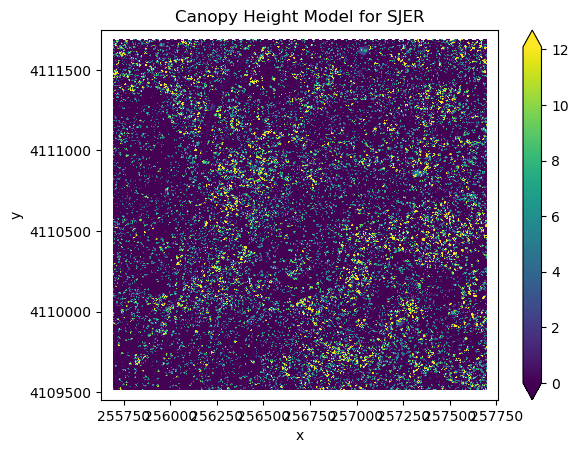

In [41]:
# reprojects the terrain to match the surface
terrain_reprojected_SJER = terrain_SJER.rio.reproject_match(surface_SJER)

# creates the CHM
canopy_SJER = surface_SJER - terrain_reprojected_SJER
canopy_SJER.compute()

# plots the chm
plt.figure()
canopy_SJER.plot(cmap="viridis", robust=True)
plt.title("Canopy Height Model for SJER")
plt.ticklabel_format(style="plain")

In [42]:
# exports the SJER CHM as a GeoTiff
canopy_SJER.rio.write_crs(surface_SJER.rio.crs, inplace=True)
canopy_SJER.rio.set_nodata(-9999.0, inplace=True)

canopy_SJER.rio.to_raster("./data/outputs/CHM_SJER.tif")

(array([3.000000e+01, 4.977000e+03, 3.138122e+06, 1.143350e+05,
        9.947700e+04, 9.681000e+04, 9.364200e+04, 8.854500e+04,
        8.437000e+04, 8.055600e+04, 7.590300e+04, 7.024100e+04,
        6.286900e+04, 5.449300e+04, 4.624600e+04, 3.716600e+04,
        2.960800e+04, 2.299500e+04, 1.776000e+04, 1.396300e+04,
        1.140800e+04, 9.920000e+03, 8.406000e+03, 7.539000e+03,
        6.739000e+03, 6.138000e+03, 5.460000e+03, 4.798000e+03,
        4.251000e+03, 3.613000e+03, 3.245000e+03, 2.785000e+03,
        2.378000e+03, 1.868000e+03, 1.482000e+03, 1.120000e+03,
        8.670000e+02, 6.620000e+02, 4.490000e+02, 3.000000e+02,
        2.030000e+02, 1.410000e+02, 7.200000e+01, 4.700000e+01,
        3.700000e+01, 1.400000e+01, 6.000000e+00, 6.000000e+00,
        5.000000e+00, 2.000000e+00]),
 array([-1.3999939 , -0.71939392, -0.03879395,  0.64180603,  1.32240601,
         2.00300598,  2.68360596,  3.36420593,  4.04480591,  4.72540588,
         5.40600586,  6.08660583,  6.76720581,  

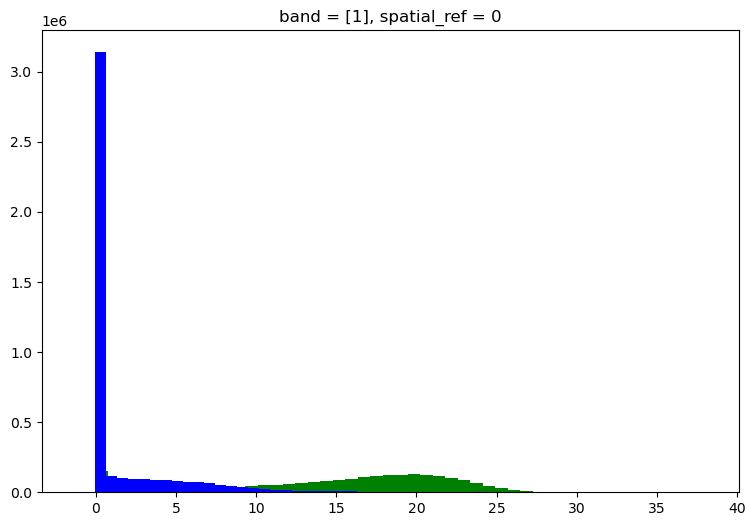

In [43]:
# compares the vegetation structure of HARV and SJER
fig, ax = plt.subplots(figsize=(9,6))

# creates histogram of HARV and SJER
canopy_HARV.plot.hist(ax = ax, bins=50, color="green")
canopy_SJER.plot.hist(ax = ax, bins=50, color="blue")